In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
# Tickers
msci_world_ticker = "URTH"  # or "IWDA.L" or other equivalent
gold_ticker = "GLD"        # SPDR Gold Trust

# Date Range
start_date = "2020-01-01"
end_date = "2023-01-01"

# Fetch Data
msci_world_data = yf.download(msci_world_ticker, period='max')
gold_data = yf.download(gold_ticker, period='max')

# Display or Save Data
print(msci_world_data.head())
print(gold_data.head())

# If needed, you can save this data to a CSV file
msci_world_data.to_csv("msci_world_data.csv")
gold_data.to_csv("gold_data.csv")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2012-01-12  50.299999  50.299999  50.299999  50.299999  40.000198     100
2012-01-13  50.299999  50.299999  50.299999  50.299999  40.000198       0
2012-01-17  50.299999  50.299999  50.299999  50.299999  40.000198       0
2012-01-18  50.299999  50.299999  50.299999  50.299999  40.000198       0
2012-01-19  51.779999  51.779999  51.779999  51.779999  41.177147     300
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2004-11-18  44.430000  44.490002  44.070000  44.380001  44.380001   5992000
2004-11-19  44.490002  44.919998  44.470001  44.779999  44.779999  11655300
2004-11-22  44.750000  44.970001  44.740

In [3]:
# Describe, plot, log diff- & ARCH Model
df = pd.DataFrame()
df['msci'] = msci_world_data['Close']
df['gold'] = gold_data['Close']
      
print(df.describe())

             msci        gold
count  756.000000  756.000000
mean   112.542156  167.621719
std     14.988550    9.511368
min     67.389999  138.039993
25%    101.177500  162.184998
50%    113.435001  167.794998
75%    125.777498  174.119995
max    136.449997  193.889999


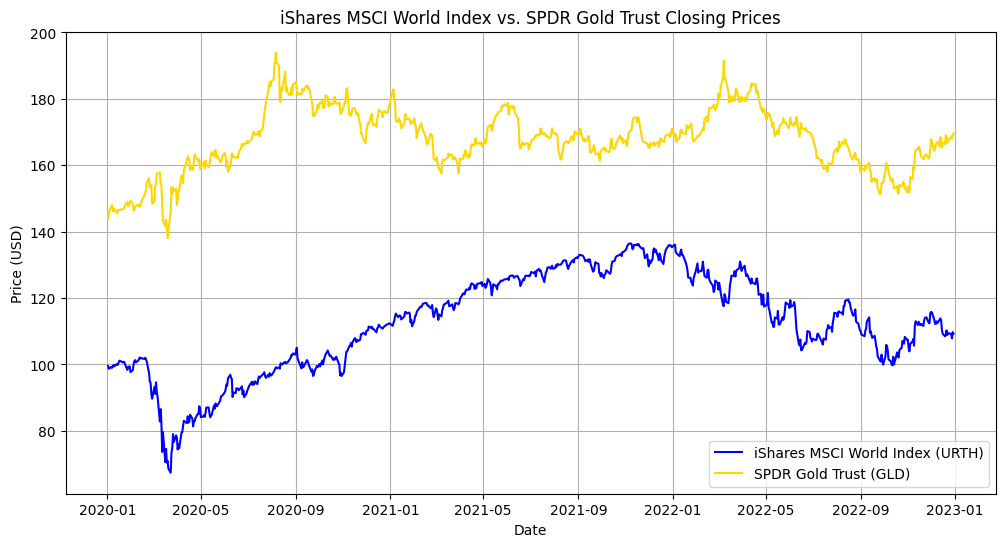

In [4]:
import matplotlib.pyplot as plt

# Extract Closing Prices
msci_world_close = msci_world_data['Close']
gold_close = gold_data['Close']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(msci_world_close, label='iShares MSCI World Index (URTH)', color='blue')
plt.plot(gold_close, label='SPDR Gold Trust (GLD)', color='gold')

# Adding titles and labels
plt.title('iShares MSCI World Index vs. SPDR Gold Trust Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [7]:
df = np.log(df).diff

<bound method DataFrame.diff of                 msci      gold
Date                          
2020-01-02  1.526156  1.603312
2020-01-03  1.524312  1.605961
2020-01-06  1.525544  1.608053
2020-01-07  1.524973  1.608840
2020-01-08  1.525587  1.607332
...              ...       ...
2022-12-23  1.546578  1.633066
2022-12-27  1.546072  1.634705
2022-12-28  1.543496  1.633824
2022-12-29  1.547161  1.634913
2022-12-30  1.546208  1.635822

[756 rows x 2 columns]>

In [22]:
frame = df
frame.describe()

,msci,gold
count,755.000000,755.000000
mean,0.000123,0.000218
std,0.015449,0.010309
min,-0.120786,-0.055190
25%,-0.006339,-0.005051
50%,0.000878,0.000618
75%,0.007666,0.005816
max,0.087061,0.047390


/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

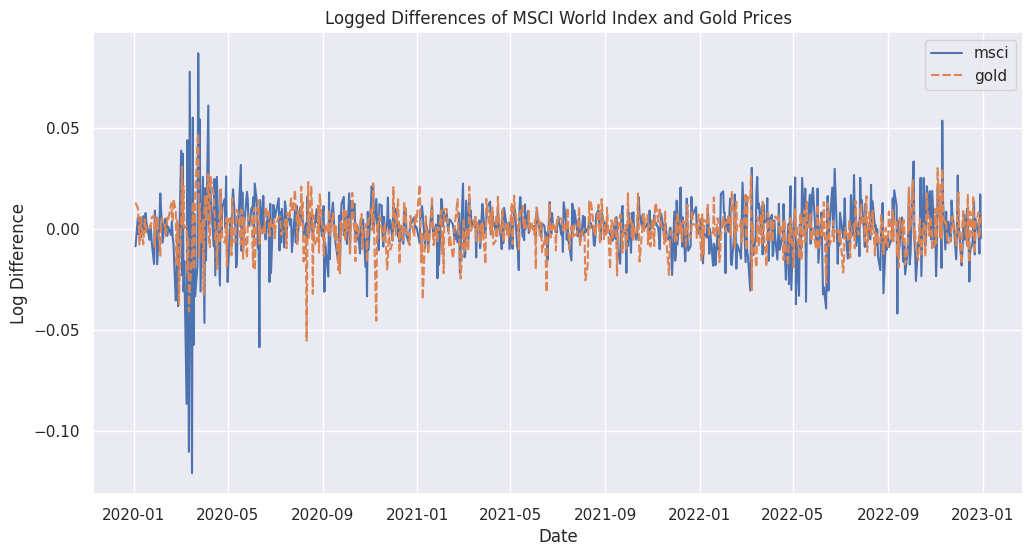

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming msci_world_data and gold_data are already defined and contain the relevant data
df = pd.DataFrame()
df['msci'] = msci_world_data['Close']
df['gold'] = gold_data['Close']

# Log difference
df = np.log(df).diff()

# Dropping NaN values that occur after differencing
df = df.dropna()

# Plot using Seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df)
plt.title('Logged Differences of MSCI World Index and Gold Prices')
plt.ylabel('Log Difference')
plt.xlabel('Date')
plt.show()


/home/august/.venvs/jupyter/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002383. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/august/.venvs/jupyter/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001061. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/august/.venvs/jupyter/lib/python3.11/site-

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2276.1226405472407
            Iterations: 7
            Function evaluations: 30
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2414.1551670952226
            Iterations: 2
            Function evaluations: 25
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   msci   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2276.12
Distribution:                  Normal   AIC:                          -4544.25
Method:            Maximum Likelihood   BIC:                          -4525.74
                                        No. Observations:                  755
Date:                Sun, Oct

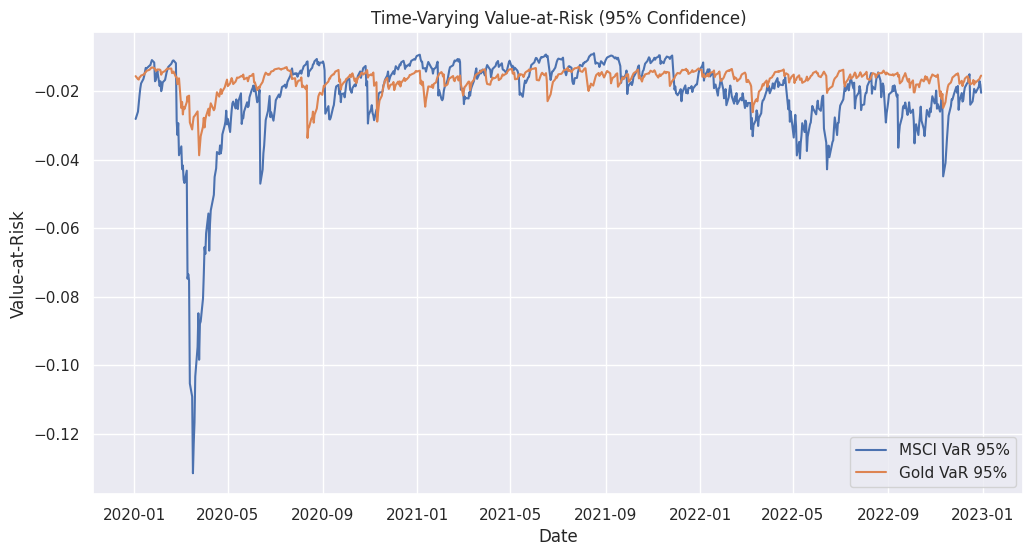

In [19]:
from arch import arch_model

# Fit GARCH(1,1) model
garch_msci = arch_model(df['msci'].dropna(), vol='Garch', p=1, q=1)
garch_gold = arch_model(df['gold'].dropna(), vol='Garch', p=1, q=1)

# Fit the model
res_msci = garch_msci.fit(update_freq=10)
res_gold = garch_gold.fit(update_freq=10)

print(res_msci.summary())
print(res_gold.summary())

# Calculate conditional standard deviation
msci_cond_std = res_msci.conditional_volatility
gold_cond_std = res_gold.conditional_volatility

# Calculate VaR (95% confidence)
z = 1.645  # For 95% confidence
msci_VaR = - (df['msci'].mean() + z * msci_cond_std)
gold_VaR = - (df['gold'].mean() + z * gold_cond_std)

# Plotting VaR
plt.figure(figsize=(12, 6))
plt.plot(msci_VaR, label='MSCI VaR 95%')
plt.plot(gold_VaR, label='Gold VaR 95%')
plt.title('Time-Varying Value-at-Risk (95% Confidence)')
plt.xlabel('Date')
plt.ylabel('Value-at-Risk')
plt.legend()
plt.show()


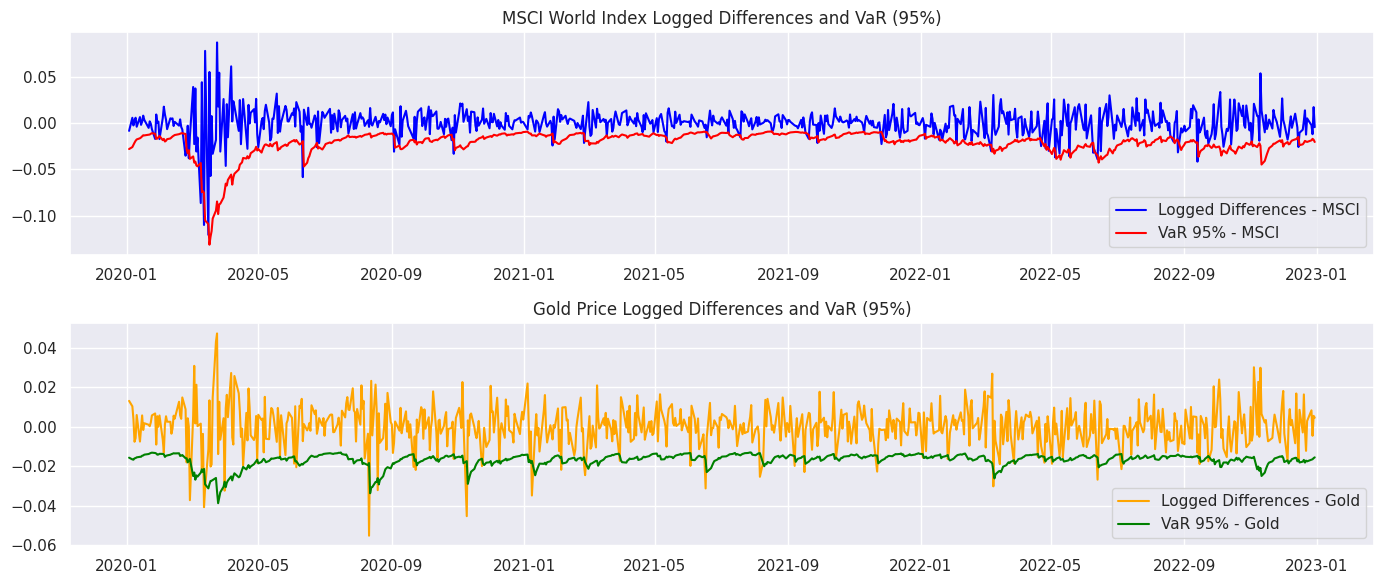

In [20]:
import matplotlib.pyplot as plt

# Ensure the models are fitted and VaR is calculated as per the previous steps

# Plotting MSCI with its VaR
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(df['msci'], label='Logged Differences - MSCI', color='blue')
plt.plot(msci_VaR, label='VaR 95% - MSCI', color='red')
plt.title('MSCI World Index Logged Differences and VaR (95%)')
plt.legend()

# Plotting Gold with its VaR
plt.subplot(2, 1, 2)
plt.plot(df['gold'], label='Logged Differences - Gold', color='orange')
plt.plot(gold_VaR, label='VaR 95% - Gold', color='green')
plt.title('Gold Price Logged Differences and VaR (95%)')
plt.legend()

plt.tight_layout()
plt.show()


In [21]:
from scipy.stats import norm

# Confidence level and z-score
confidence_level = 0.95
z_score = norm.ppf(confidence_level)

# Calculate VaR
msci_mean, msci_std = df['msci'].mean(), msci_cond_std
gold_mean, gold_std = df['gold'].mean(), gold_cond_std

msci_VaR = - (msci_mean + z_score * msci_std)
gold_VaR = - (gold_mean + z_score * gold_std)

# Calculate Expected Shortfall
msci_ES = - (msci_mean + (norm.pdf(z_score) / (1 - confidence_level)) * msci_std)
gold_ES = - (gold_mean + (norm.pdf(z_score) / (1 - confidence_level)) * gold_std)

print(f"MSCI VaR (5% tail): {msci_VaR[-1]:.4f}")
print(f"Gold VaR (5% tail): {gold_VaR[-1]:.4f}")
print(f"MSCI Expected Shortfall: {msci_ES[-1]:.4f}")
print(f"Gold Expected Shortfall: {gold_ES[-1]:.4f}")


MSCI VaR (5% tail): -0.0205
Gold VaR (5% tail): -0.0155
MSCI Expected Shortfall: -0.0256
Gold Expected Shortfall: -0.0193


/tmp/ipykernel_36264/1064669103.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"MSCI VaR (5% tail): {msci_VaR[-1]:.4f}")
/tmp/ipykernel_36264/1064669103.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Gold VaR (5% tail): {gold_VaR[-1]:.4f}")
/tmp/ipykernel_36264/1064669103.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"MSCI Expected Shortfall: {msci_ES[-1]:.4f}")
/tmp/ipykernel_36264/106466910

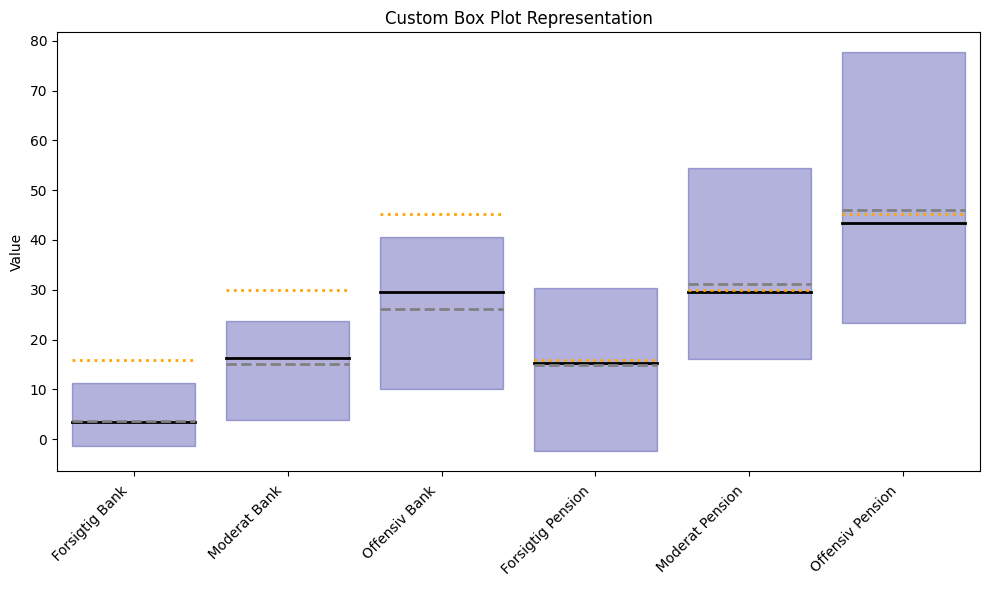

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df = pd.read_csv('clean_box_this_plot.csv', )


import pandas as pd
import matplotlib.pyplot as plt


# Clean and prepare the DataFrame
# Rename 'Unnamed: 0' to 'Statistics' and set it as the index
df.rename(columns={'Unnamed: 0': 'Statistics'}, inplace=True)
df.set_index('Statistics', inplace=True)
df.index = df.index.str.strip()  # Remove any leading/trailing whitespace
df.dropna(axis=1, how='all', inplace=True)  # Drop columns that are entirely NaN

# Convert data to float for plotting
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Extract relevant statistics
min_val = df.loc['Min']
max_val = df.loc['Max']
median_val = df.loc['Median']
mean_val = df.loc['Mean']
pm_val = df.loc['Pm']

# Plot customization
plt.figure(figsize=(10, 6))
categories = df.columns

# Plot each category
for i, category in enumerate(categories):
    # Shading for min to max range
    plt.fill_betweenx([min_val[category], max_val[category]], i-0.4, i+0.4, color='darkblue', alpha=0.3)
    # Median line
    plt.plot([i-0.4, i+0.4], [median_val[category], median_val[category]], color='black', linewidth=2)
    # Mean line
    plt.plot([i-0.4, i+0.4], [mean_val[category], mean_val[category]], color='gray', linestyle='--', linewidth=2)
    # Pm line
    plt.plot([i-0.4, i+0.4], [pm_val[category], pm_val[category]], color='orange', linestyle=':', linewidth=2)

plt.xticks(range(len(categories)), categories, rotation=45, ha='right')
plt.ylabel('Value')
plt.title('Custom Box Plot Representation')
plt.xlim(-0.5, len(categories) - 0.5)
plt.tight_layout()

# Show the plot
plt.show()
